In [2]:
#pip3 install cfgrib
import xarray as xr

In [3]:
ds = xr.open_dataset("adaptor.mars.external-1710257548.0572608-2150-2-b0ff3491-f3ea-492a-bd00-38b4f9e4c322.grib", engine='cfgrib')

# Print information about the dataset
print(ds)

# Get the number of entries
num_entries = len(ds)

print(f"The GRIB file has {num_entries} entries.")


ds.close()


/home/ori/.local/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


<xarray.Dataset> Size: 640kB
Dimensions:    (time: 61, values: 371)
Coordinates:
  * time       (time) datetime64[ns] 488B 2022-06-01T12:00:00 ... 2022-07-31T...
    surface    float64 8B ...
    latitude   (values) float64 3kB ...
    longitude  (values) float64 3kB ...
Dimensions without coordinates: values
Data variables:
    fbupinx    (time, values) float32 91kB ...
    drtcode    (time, values) float32 91kB ...
    dufmcode   (time, values) float32 91kB ...
    ffmcode    (time, values) float32 91kB ...
    fdsrte     (time, values) float32 91kB ...
    fwinx      (time, values) float32 91kB ...
    infsinx    (time, values) float32 91kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-13T

In [4]:
latitudes = ds.latitude.values
print(latitudes)
print(ds.longitude.values)
ds['longitude'] = (ds.longitude + 180) % 360 - 180
longitudes = ds.longitude.values

print(f"Latitude: {latitudes[0]}")
print(len(latitudes))
print(len(longitudes))
print(f"Longitude: {longitudes[0]}")

[42.0140358  42.0140358  42.0140358  42.0140358  42.0140358  42.0140358
 42.0140358  42.0140358  42.0140358  42.0140358  41.7330055  41.7330055
 41.7330055  41.7330055  41.7330055  41.7330055  41.7330055  41.7330055
 41.7330055  41.7330055  41.45197521 41.45197521 41.45197521 41.45197521
 41.45197521 41.45197521 41.45197521 41.45197521 41.45197521 41.45197521
 41.17094492 41.17094492 41.17094492 41.17094492 41.17094492 41.17094492
 41.17094492 41.17094492 41.17094492 41.17094492 40.88991463 40.88991463
 40.88991463 40.88991463 40.88991463 40.88991463 40.88991463 40.88991463
 40.88991463 40.88991463 40.60888433 40.60888433 40.60888433 40.60888433
 40.60888433 40.60888433 40.60888433 40.60888433 40.60888433 40.60888433
 40.32785403 40.32785403 40.32785403 40.32785403 40.32785403 40.32785403
 40.32785403 40.32785403 40.32785403 40.32785403 40.04682373 40.04682373
 40.04682373 40.04682373 40.04682373 40.04682373 40.04682373 40.04682373
 40.04682373 40.04682373 39.76579343 39.76579343 39.76

In [5]:
data = ds.time.values
print(data)

['2022-06-01T12:00:00.000000000' '2022-06-02T12:00:00.000000000'
 '2022-06-03T12:00:00.000000000' '2022-06-04T12:00:00.000000000'
 '2022-06-05T12:00:00.000000000' '2022-06-06T12:00:00.000000000'
 '2022-06-07T12:00:00.000000000' '2022-06-08T12:00:00.000000000'
 '2022-06-09T12:00:00.000000000' '2022-06-10T12:00:00.000000000'
 '2022-06-11T12:00:00.000000000' '2022-06-12T12:00:00.000000000'
 '2022-06-13T12:00:00.000000000' '2022-06-14T12:00:00.000000000'
 '2022-06-15T12:00:00.000000000' '2022-06-16T12:00:00.000000000'
 '2022-06-17T12:00:00.000000000' '2022-06-18T12:00:00.000000000'
 '2022-06-19T12:00:00.000000000' '2022-06-20T12:00:00.000000000'
 '2022-06-21T12:00:00.000000000' '2022-06-22T12:00:00.000000000'
 '2022-06-23T12:00:00.000000000' '2022-06-24T12:00:00.000000000'
 '2022-06-25T12:00:00.000000000' '2022-06-26T12:00:00.000000000'
 '2022-06-27T12:00:00.000000000' '2022-06-28T12:00:00.000000000'
 '2022-06-29T12:00:00.000000000' '2022-06-30T12:00:00.000000000'
 '2022-07-01T12:00:00.000

In [6]:
import math
def DistanceTwoPoints(lat1, lon1, lat2, lon2):
    R = 6371e3  # Radius of the Earth in meters
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c  # Distance in meters

def find_nearest(lat, lon, latitudes, longitudes):
    min_distance = None
    nearest_point = None

    for lat2, lon2 in zip(latitudes, longitudes):
        distance = DistanceTwoPoints(lat, lon, lat2, lon2)
        if min_distance is None or distance < min_distance:
            min_distance = distance
            nearest_point = (lat2, lon2)

    return min_distance, nearest_point

In [7]:
#40.20875,-7.36260499954224
#40.1394270001517,-7.50764199998644
LATITUDE_SING = 40.1394270001517
LONGITUDE_SING = -7.50764199998644


min_distance, nearest_point = find_nearest(LATITUDE_SING, LONGITUDE_SING, latitudes, longitudes)

In [8]:
print(min_distance, nearest_point)

11218.940306421619 (40.046823734200636, -7.559999999999945)


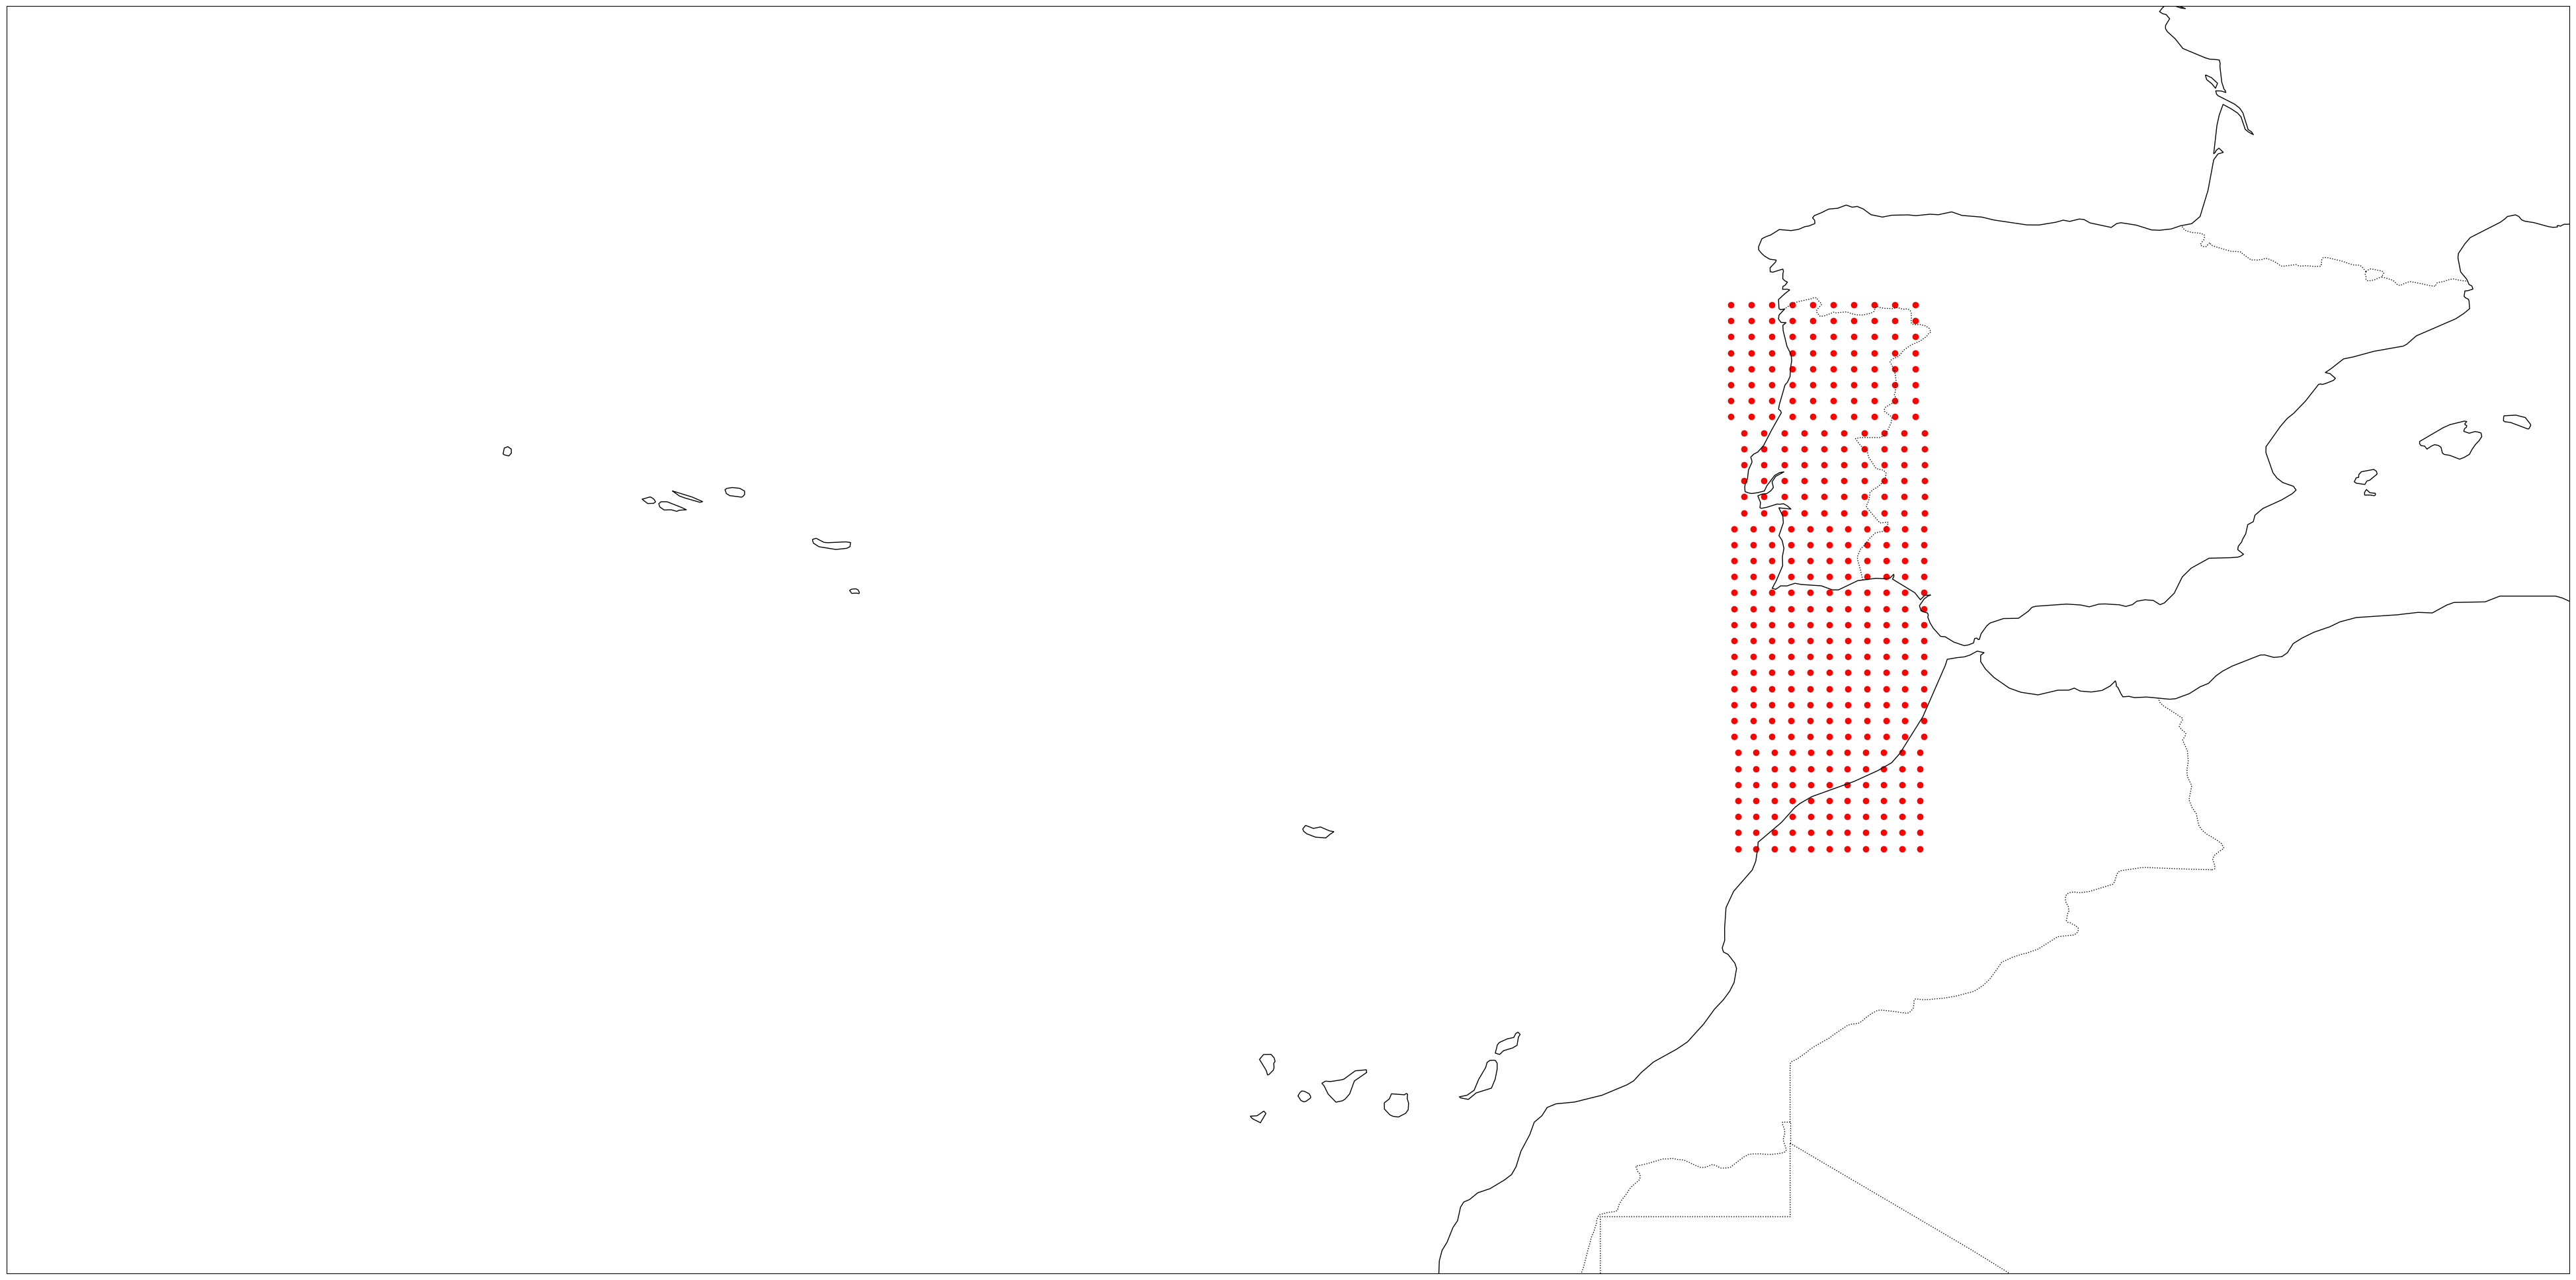

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map centered around the Iberian Peninsula
fig, ax = plt.subplots(figsize=(50, 50), subplot_kw=dict(projection=ccrs.PlateCarree()))

#[longitude_min, longitude_max, latitude_min, latitude_max]
ax.set_extent([-40, 5, 25, 45])

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the points on the map
plt.scatter(longitudes[:len(latitudes)], latitudes, color='red', transform=ccrs.PlateCarree())

plt.savefig('map2.png', dpi=300)

plt.show()